# 📊 Analysis of Top Trending YouTube Videos (Titles) Across Different Countries

## **Objective:**
The goal of this notebook is to analyze the titles of the top trending YouTube videos across different countries. We will perform various text analyses, such as:
- Word frequency analysis
- Bigram/trigram analysis
- Country-based comparison of trending video topics

## **Dataset:**
We are using the *"Trending YouTube Video Statistics"* dataset, which includes information about video titles, descriptions, views, likes, and dislikes. The dataset is available in both **JSON** and **Excel** formats. The available data is for the year of **2017** and **2018**

## **Required Libraries:**
- `pandas`: For data manipulation
- `nltk`: For text cleaning and stopwords removal
- `wordcloud`: For visualizing the most frequent words in video titles
- `matplotlib`: For generating plots
- `re`: For text cleaning
- `sqlalchemy`: For database operations
- `pyodbc`: For connecting to ODBC databases.

---



# 📝 *Translation and Encoding Fixing for Non-English YouTube Titles*

## **Objective:**
In this step, we aim to:
1. **Fix encoding issues** in the YouTube video titles using the **FTFY** library.
2. **Translate non-English titles to English** using the **DeepL Translator** (via `deep-translator` library) or **Google Translate**.

This is important because YouTube video titles may contain characters that are poorly encoded or are in various languages, which could affect analysis. By fixing the encoding and translating the titles, we ensure consistency and clarity for analysis.

---

## **Required Libraries:**
1. **FTFY** – To fix text encoding issues like malformed characters.
2. **deep-translator** – To translate non-English text to English using DeepL or Google Translate.

### Install the required libraries:
```bash
pip install ftfy deep-translator


In [ ]:
import pandas as pd
import glob
import os  
import ftfy
from concurrent.futures import ThreadPoolExecutor
from deep_translator import GoogleTranslator
from datetime import datetime



In [ ]:


path = r'E:\SQL'  # Use your path
all_files = glob.glob(os.path.join(path, "*.csv"))  # open all the csv files on the folder
def fix_dataframe(df):
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].apply(lambda x: ftfy.fix_text(x) if isinstance(x, str) else x)
    return df

# Function to process each file
def process_file(filename):
    try:
        df = pd.read_csv(filename, index_col=None, header=0, encoding='ISO-8859-1')
        df = df.sort_values(by='views').iloc[:100]
        df = fix_dataframe(df)  # Apply mojibake fixes
        df['filename'] = os.path.basename(filename)
        return df
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return pd.DataFrame()

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_file, all_files))

# Concatenate all DataFrames
frame = pd.concat(results, axis=0, ignore_index=True)

# Preview the result
frame.head()


video_id trending_date  \
0  bz91MAdY6FQ      18.14.05   
1  _QPStIydtgg      18.14.02   
2  CGv_PLrWArs      18.14.02   
3  MTtFpn9C7Q4      18.26.02   
4  0ayARJdf7I4      17.16.11   

                                               title    channel_title  \
0          ''Gala Artis 2018'' Le numéro d'ouverture         mart lat   
1  Canadian Olympian receives death threats from ...     The National   
2  Raptors Post-Game: DeMar DeRozan - February 13...  Toronto Raptors   
3  Simon Olivier Fecteau créateur des derniers By...         mart lat   
4                      018 Algebra Lineal 18-10-2011        udearroba   

   category_id              publish_time  \
0           24  2018-05-14T00:43:35.000Z   
1           25  2018-02-14T03:45:33.000Z   
2           17  2018-02-14T03:32:57.000Z   
3           24  2018-02-26T03:18:13.000Z   
4           27  2017-11-15T18:20:06.000Z   

                                                tags  views  likes  dislikes  \
0  gala|"artis"|"2018"|"numéro d'ouverture"|"Yama...    733     10         4   
1  Kim Boutin|"Canadian Olympian"|"bronze medal"|...   1000     46        19   
2  NBA|"Toronto"|"Toronto Raptors"|"Raptors"|"Bas...   1023     65         5   
3  Simon Olivier Fecteau|"Bye bye"|"En audition a...   1107     14         1   
4                                             [none]   1141      0         0   

   comment_count                                  thumbnail_link  \
0              0  https://i.ytimg.com/vi/bz91MAdY6FQ/default.jpg   
1              0  https://i.ytimg.com/vi/_QPStIydtgg/default.jpg   
2             23  https://i.ytimg.com/vi/CGv_PLrWArs/default.jpg   
3              3  https://i.ytimg.com/vi/MTtFpn9C7Q4/default.jpg   
4              0  https://i.ytimg.com/vi/0ayARJdf7I4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1               True             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description      filename  
0  Anim.: Maripier Morin et Jean-Philippe Dion. L...  CAvideos.csv  
1  Canadian Olympian Kim Boutin received threats ...  CAvideos.csv  
2  DeMar DeRozan addresses the media following To...  CAvideos.csv  
3  Simon Olivier Fecteau renoue avec son ingrat p...  CAvideos.csv  
4                                     Base ortogonal  CAvideos.csv

In [ ]:


# Apply conversion to the whole 'trending_date' column from "yy-dd-mm" to "yyyy-mm-dd"
frame["trending_date"] = frame["trending_date"].apply(
    lambda x: datetime.strptime(x, "%y.%d.%m").strftime("%Y-%m-%d")
)


In [ ]:
frame.head()
frame["description"]=frame["description"].fillna("").apply(ftfy.fix_text)
frame["title"]=frame["title"].apply(ftfy.fix_text)
frame["translated_title"] = frame.apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x.title), axis=1)
frame["translated_desc"] = frame.apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x.description), axis=1)


In [38]:
frame.head()

video_id trending_date  \
0  bz91MAdY6FQ    2018-05-14   
1  _QPStIydtgg    2018-02-14   
2  CGv_PLrWArs    2018-02-14   
3  MTtFpn9C7Q4    2018-02-26   
4  0ayARJdf7I4    2017-11-16   

                                               title    channel_title  \
0          ''Gala Artis 2018'' Le numéro d'ouverture         mart lat   
1  Canadian Olympian receives death threats from ...     The National   
2  Raptors Post-Game: DeMar DeRozan - February 13...  Toronto Raptors   
3  Simon Olivier Fecteau créateur des derniers By...         mart lat   
4                      018 Algebra Lineal 18-10-2011        udearroba   

   category_id              publish_time  \
0           24  2018-05-14T00:43:35.000Z   
1           25  2018-02-14T03:45:33.000Z   
2           17  2018-02-14T03:32:57.000Z   
3           24  2018-02-26T03:18:13.000Z   
4           27  2017-11-15T18:20:06.000Z   

                                                tags  views  likes  dislikes  \
0  gala|"artis"|"2018"|"numéro d'ouverture"|"Yama...    733     10         4   
1  Kim Boutin|"Canadian Olympian"|"bronze medal"|...   1000     46        19   
2  NBA|"Toronto"|"Toronto Raptors"|"Raptors"|"Bas...   1023     65         5   
3  Simon Olivier Fecteau|"Bye bye"|"En audition a...   1107     14         1   
4                                             [none]   1141      0         0   

   comment_count                                  thumbnail_link  \
0              0  https://i.ytimg.com/vi/bz91MAdY6FQ/default.jpg   
1              0  https://i.ytimg.com/vi/_QPStIydtgg/default.jpg   
2             23  https://i.ytimg.com/vi/CGv_PLrWArs/default.jpg   
3              3  https://i.ytimg.com/vi/MTtFpn9C7Q4/default.jpg   
4              0  https://i.ytimg.com/vi/0ayARJdf7I4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1               True             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description      filename  \
0  Anim.: Maripier Morin et Jean-Philippe Dion. L...  CAvideos.csv   
1  Canadian Olympian Kim Boutin received threats ...  CAvideos.csv   
2  DeMar DeRozan addresses the media following To...  CAvideos.csv   
3  Simon Olivier Fecteau renoue avec son ingrat p...  CAvideos.csv   
4                                     Base ortogonal  CAvideos.csv   

                                    translated_title  \
0           '' Gala Artis 2018 '' The opening number   
1  Canadian Olympian receives death threats from ...   
2  Raptors Post-Game: DeMar DeRozan - February 13...   
3  Simon Olivier Fecteau Creator of the Last Bye ...   
4                      018 Algebra Lineal 18-10-2011   

                                     translated_desc  
0  Anim.: Maripier Morin and Jean-Philippe Dion. ...  
1  Canadian Olympian Kim Boutin received threats ...  
2  DeMar DeRozan addresses the media following To...  
3  Simon Olivier FECTEAU recruits with his ungrat...  
4                                     Base ortogonal

# 📝 *Export Translated YouTube Titles into SQL Database*

## **Objective:**
After translating the non-English YouTube video titles into English, we will export the translated results into an SQL table. We will use the **SQLAlchemy** library to connect to the database and **PyODBC** for handling the database connection.

---

## **Required Libraries:**

1. **SQLAlchemy** – To interact with the SQL database in an easy and Pythonic way.
2. **PyODBC** – To handle the ODBC connection for databases like SQL Server.
3. **Pandas** – For data manipulation and handling the dataset.

### Install the required libraries:
```bash
pip install sqlalchemy pyodbc pandas


In [39]:
from sqlalchemy import create_engine,text
import pyodbc

In [40]:
server = "localhost\\SQLEXPRESS"
database = "SampleDB"
driver = "ODBC Driver 17 for SQL Server"
engine = create_engine(
    f"mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver={driver}"
)
con = engine.connect()

In [41]:
frame.to_sql('translated_combined_table', con=engine, if_exists='replace', index=False)

10

# 🎯 Access Translated Titles from SQL Server & Generate WordClouds by Country

## 🗂️ Objective:
After storing the translated YouTube titles in a SQL Server table, this section covers:
1. Connecting to the SQL Server to retrieve the translated data.
2. Generating **Word Clouds** based on the translated titles **grouped by country** to visualize trending patterns.

---

## 📦 Required Libraries:

Make sure these packages are installed:

```bash
pip install nltk re matplotlib wordcloud


In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re

In [44]:
server = "localhost\\SQLEXPRESS"
database = "SampleDB"
driver = "ODBC Driver 17 for SQL Server"

# Use an f-string to inject variables into the connection string
cnxn = pyodbc.connect(
    f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
)

cursor = cnxn.cursor()
cursor.execute("SELECT * FROM translated_combined_table")
columns = [column[0] for column in cursor.description]
rows = [tuple(row) for row in cursor.fetchall()] 

# Create DataFrame with column names
df = pd.DataFrame(rows, columns=columns)



In [45]:
df.head()

video_id trending_date  \
0  bz91MAdY6FQ    2018-05-14   
1  _QPStIydtgg    2018-02-14   
2  CGv_PLrWArs    2018-02-14   
3  MTtFpn9C7Q4    2018-02-26   
4  0ayARJdf7I4    2017-11-16   

                                               title    channel_title  \
0          ''Gala Artis 2018'' Le numéro d'ouverture         mart lat   
1  Canadian Olympian receives death threats from ...     The National   
2  Raptors Post-Game: DeMar DeRozan - February 13...  Toronto Raptors   
3  Simon Olivier Fecteau créateur des derniers By...         mart lat   
4                      018 Algebra Lineal 18-10-2011        udearroba   

   category_id              publish_time  \
0           24  2018-05-14T00:43:35.000Z   
1           25  2018-02-14T03:45:33.000Z   
2           17  2018-02-14T03:32:57.000Z   
3           24  2018-02-26T03:18:13.000Z   
4           27  2017-11-15T18:20:06.000Z   

                                                tags  views  likes  dislikes  \
0  gala|"artis"|"2018"|"numéro d'ouverture"|"Yama...    733     10         4   
1  Kim Boutin|"Canadian Olympian"|"bronze medal"|...   1000     46        19   
2  NBA|"Toronto"|"Toronto Raptors"|"Raptors"|"Bas...   1023     65         5   
3  Simon Olivier Fecteau|"Bye bye"|"En audition a...   1107     14         1   
4                                             [none]   1141      0         0   

   comment_count                                  thumbnail_link  \
0              0  https://i.ytimg.com/vi/bz91MAdY6FQ/default.jpg   
1              0  https://i.ytimg.com/vi/_QPStIydtgg/default.jpg   
2             23  https://i.ytimg.com/vi/CGv_PLrWArs/default.jpg   
3              3  https://i.ytimg.com/vi/MTtFpn9C7Q4/default.jpg   
4              0  https://i.ytimg.com/vi/0ayARJdf7I4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1               True             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description      filename  \
0  Anim.: Maripier Morin et Jean-Philippe Dion. L...  CAvideos.csv   
1  Canadian Olympian Kim Boutin received threats ...  CAvideos.csv   
2  DeMar DeRozan addresses the media following To...  CAvideos.csv   
3  Simon Olivier Fecteau renoue avec son ingrat p...  CAvideos.csv   
4                                     Base ortogonal  CAvideos.csv   

                                    translated_title  \
0           '' Gala Artis 2018 '' The opening number   
1  Canadian Olympian receives death threats from ...   
2  Raptors Post-Game: DeMar DeRozan - February 13...   
3  Simon Olivier Fecteau Creator of the Last Bye ...   
4                      018 Algebra Lineal 18-10-2011   

                                     translated_desc  
0  Anim.: Maripier Morin and Jean-Philippe Dion. ...  
1  Canadian Olympian Kim Boutin received threats ...  
2  DeMar DeRozan addresses the media following To...  
3  Simon Olivier FECTEAU recruits with his ungrat...  
4                                     Base ortogonal

In [46]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['country']=df['filename'].map(lambda x: x.rstrip('videos.csv'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


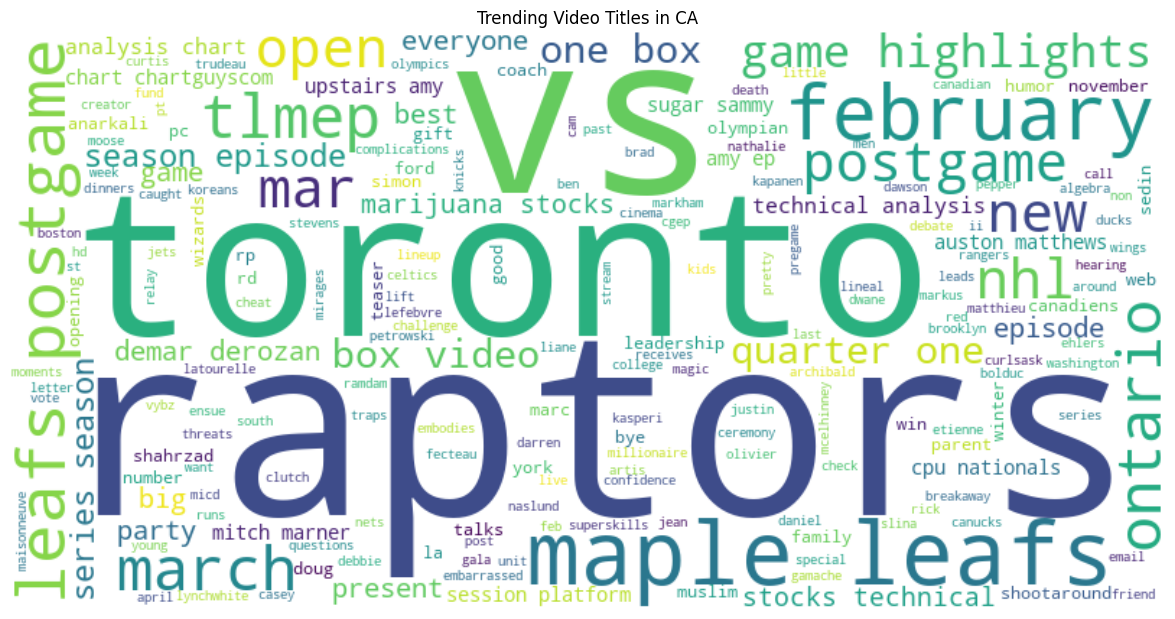

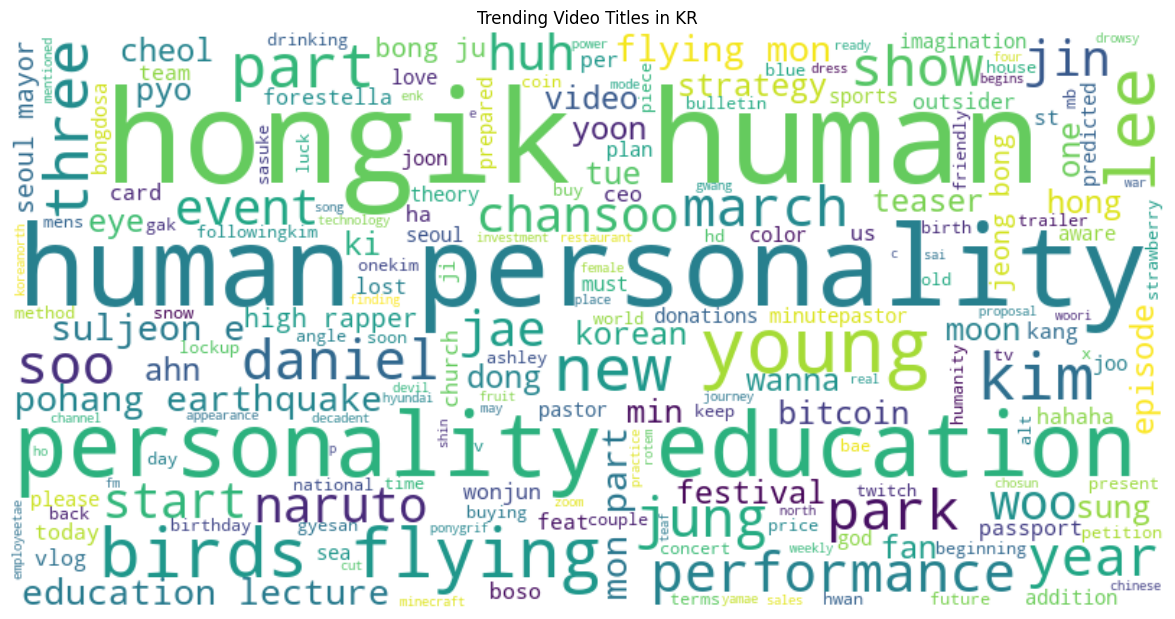

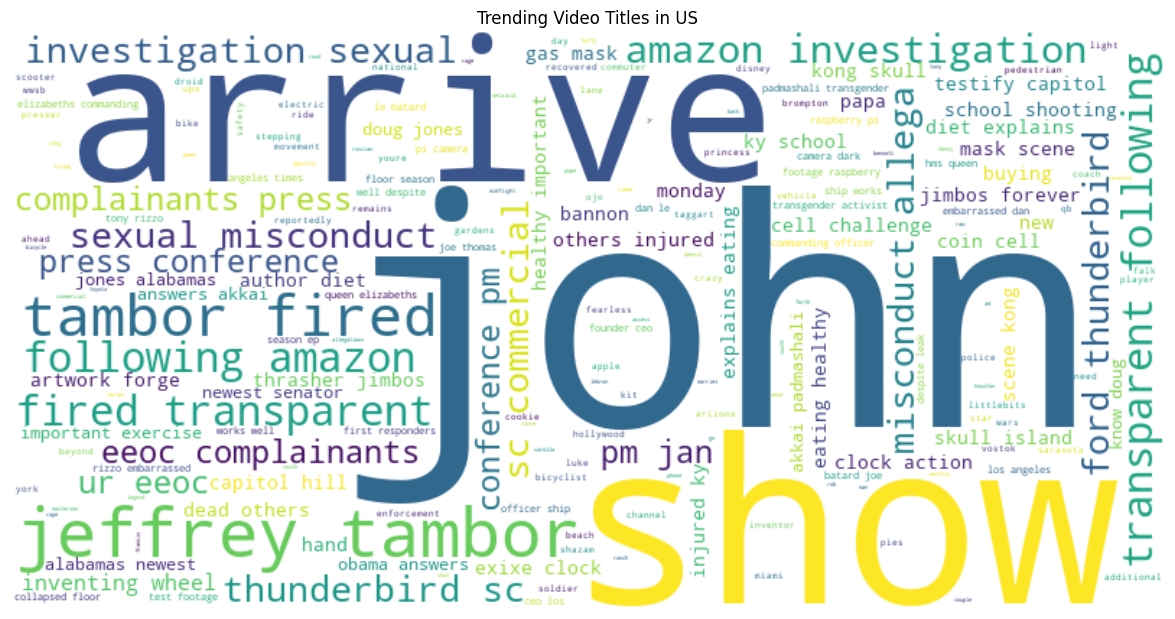

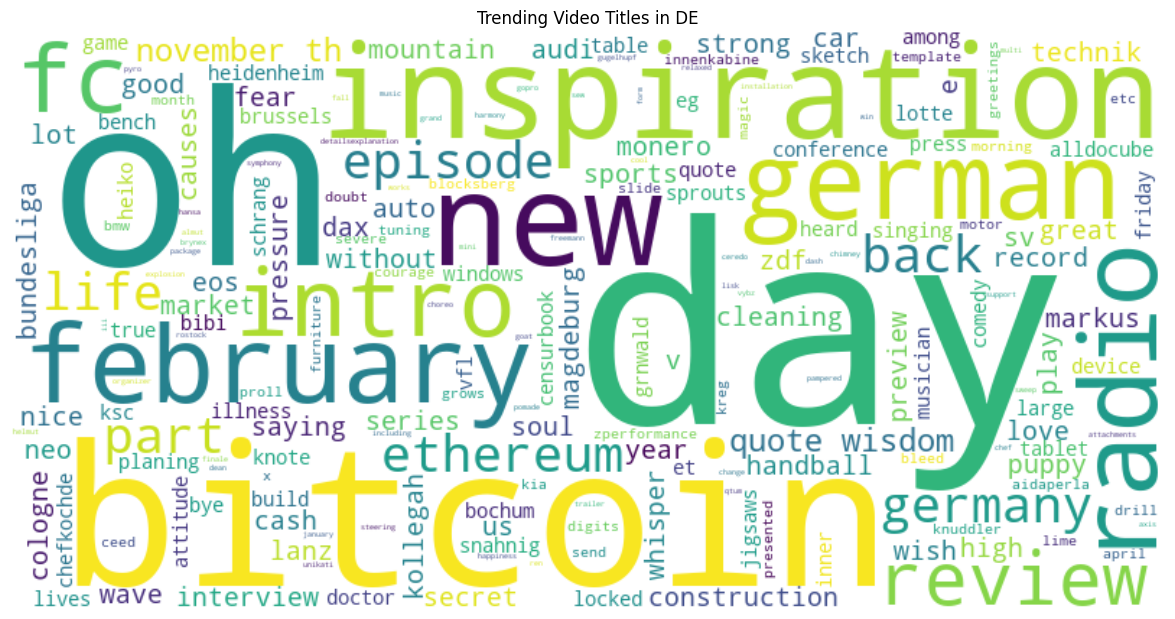

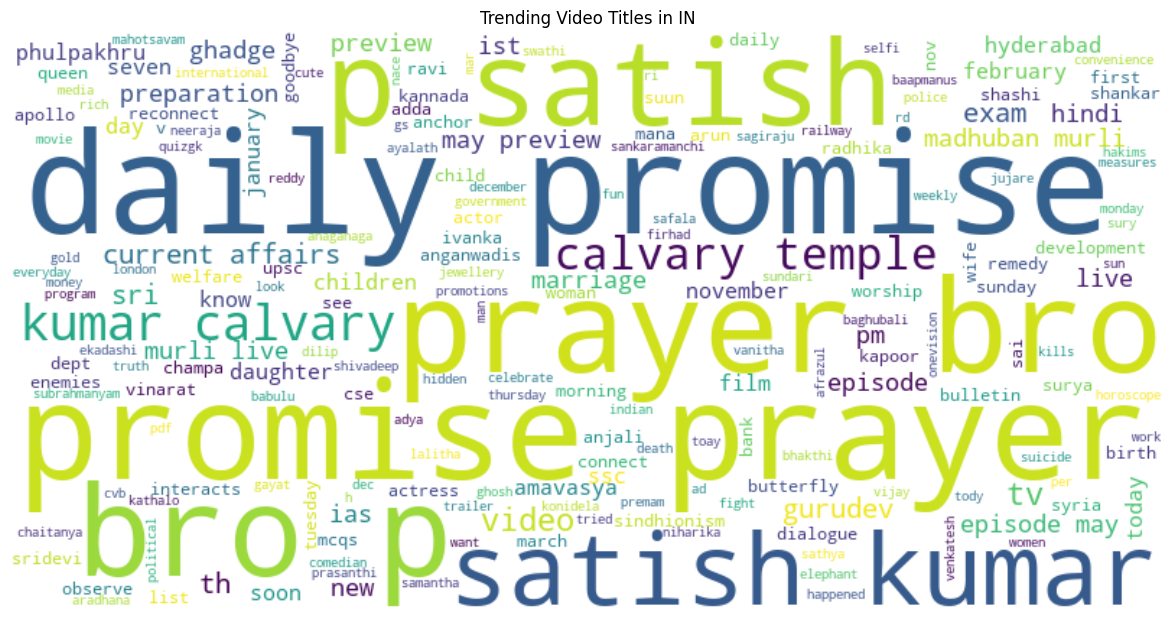

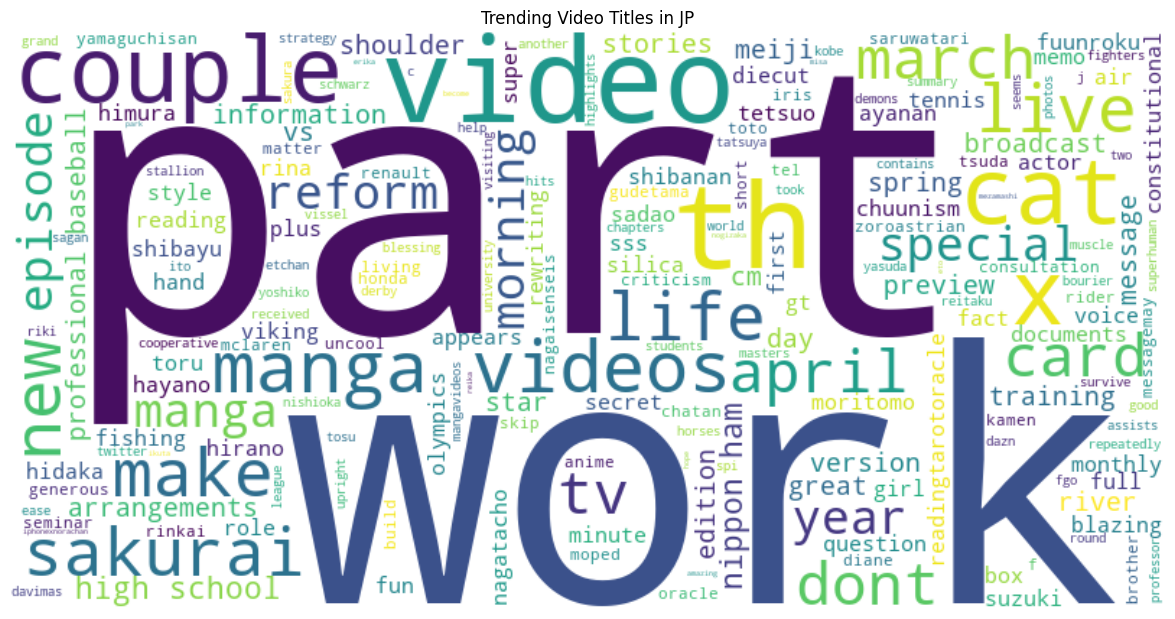

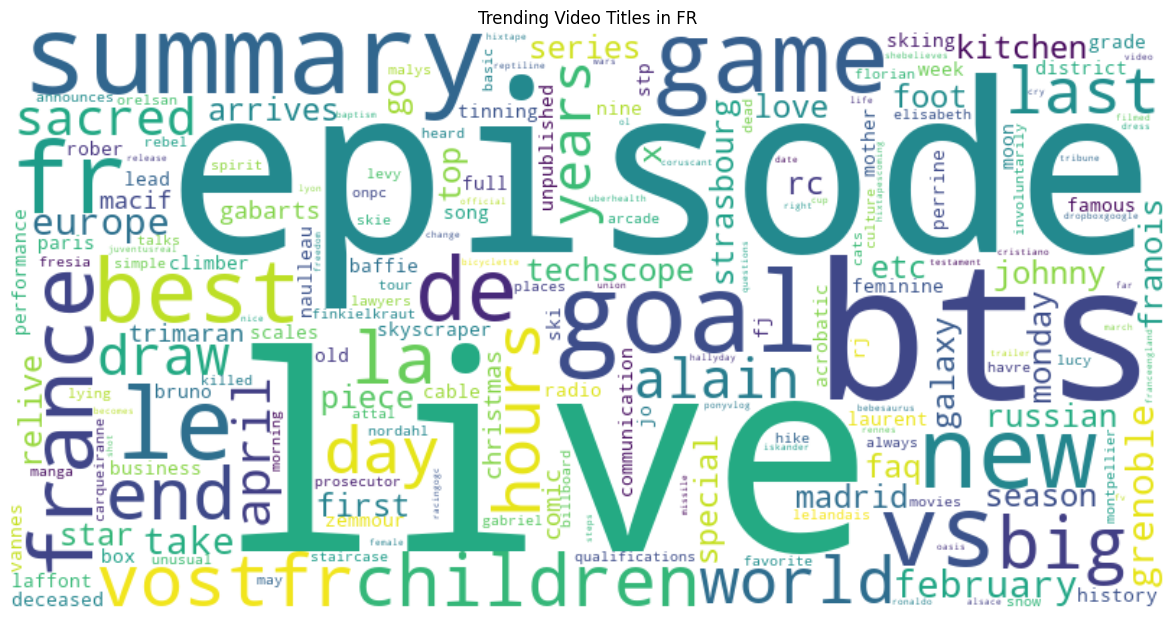

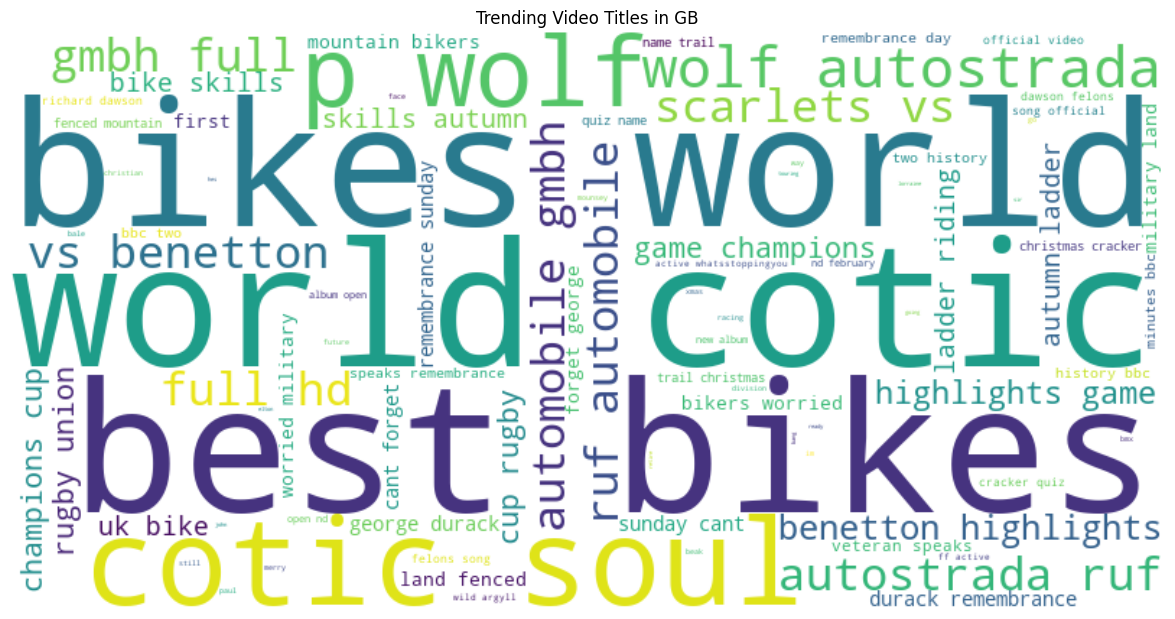

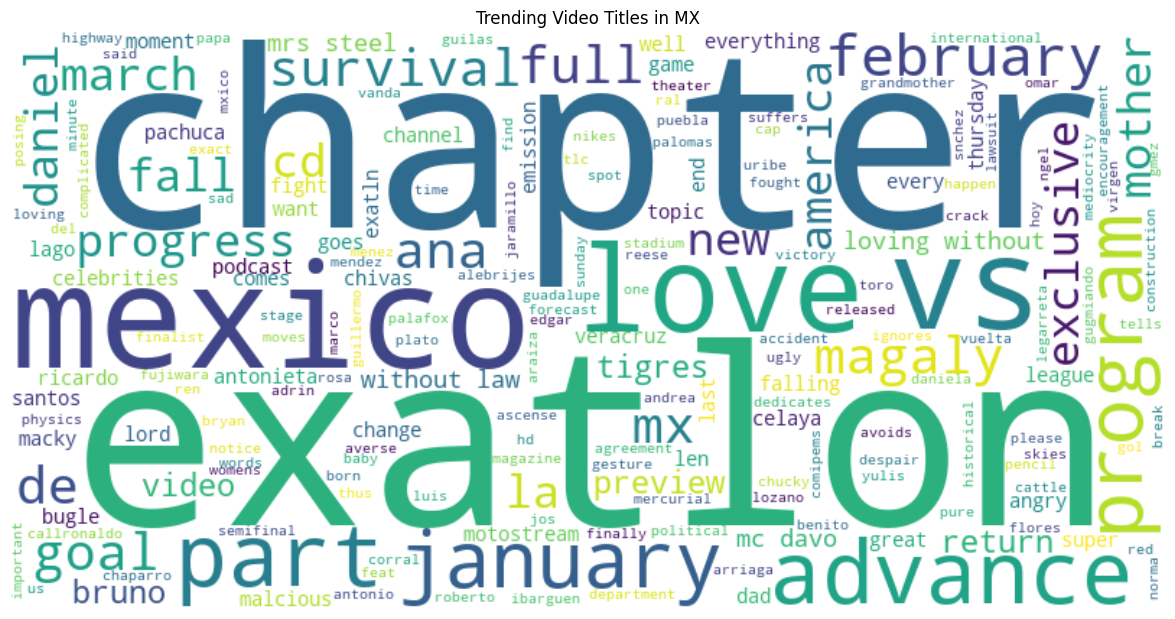

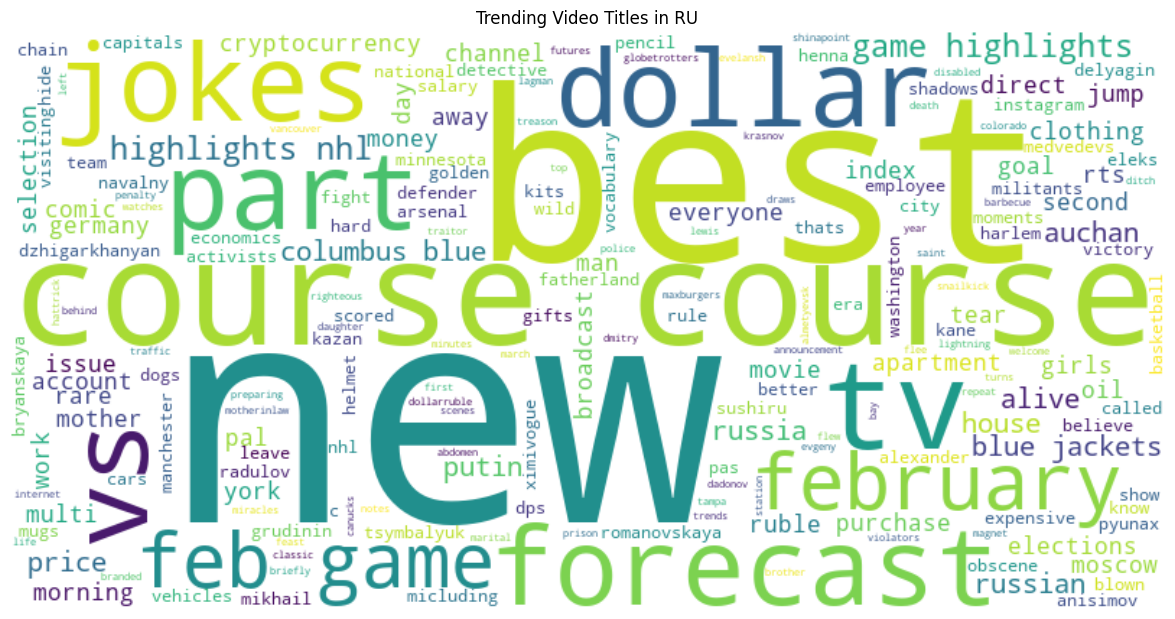

In [47]:
Countries = df['country'].unique()

# Loop through each country and generate a word cloud
for country in Countries:
    data = df[df['country'] == country]
    
    # Combine all titles into a single string
    text = ' '.join(data['translated_title'].dropna().astype(str))
    
    # Clean the text
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-letter characters
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Trending Video Titles in {country}')
    plt.show()

## 🎯 Summary of Trending Video Titles Across Multiple Countries

Analyzing the trending video titles across South Korea (KR), Canada (CA), the United States (US), Germany (DE), India (IN), Japan (JP), France (FR), Great Britain (GB), Mexico (MX), and Russia (RU) reveals a fascinating snapshot of global online attention:

**Overarching Trends:**

* **Local Culture and Language Matter:** Trending content is heavily influenced by local languages, cultural icons (like "BTS" in France or specific sports teams), and current events within each country.
* **Personalities and Names Drive Views:** Across many regions (KR, US, IN, JP, MX), specific names of individuals, whether celebrities, public figures, or even show hosts, are prominent in trending titles.
* **Event-Driven Peaks:** Specific timeframes (months like February, March, April, November) and events (like "Birthday," "Festival," "Remembrance Day," elections) often correlate with trending video topics.
* **Diverse Content Consumption:** While some themes are universal (like "New" content or entertainment), the specific categories that dominate vary significantly by country, ranging from sports to religion, education, and specific reality TV shows.

**Country-Specific Highlights:**

* **South Korea (KR):** Strong focus on individual personalities ("Hongki," "Human," "Kim"), events, music performances ("Flying," "Performance"), and educational content ("Education," "Lecture").
* **Canada (CA):** Overwhelmingly dominated by local sports teams ("Toronto Raptors," "Maple Leafs"), with some interest in finance ("Bitcoin," "Stocks").
* **United States (US):** Driven by news and current events, particularly investigations and misconduct, along with specific personalities ("John," "Jeffrey") and topics like Amazon and a "Thunderbird" phenomenon.
* **Germany (DE):** Emphasis on positive themes ("New Day," "Inspiration"), national content ("German/Germany," "Bundesliga"), finance ("Bitcoin," "Ethereum"), and product reviews.
* **India (IN):** Strong interest in specific personalities ("Satish," "Kumar"), religious content ("Prayer," "Calvary Temple"), daily updates, and content in various regional languages.
* **Japan (JP):** Focus on serialized content ("Video," "Part," "Episode"), work-related themes, Japanese pop culture (anime, manga), and specific timeframes.
* **France (FR):** Dominated by episodic content and live streams, the popularity of BTS, children's content, and new releases.
* **Great Britain (GB):** Strong interest in wildlife (wolves), cycling, a specific topic/brand ("Cotic"), and sports (rugby).
* **Mexico (MX):** Massively influenced by the reality show "Exatlón," along with interest in Mexican football and romantic content.
* **Russia (RU):** Emphasis on educational/informative content ("New Course"), finance (Ruble/Dollar exchange), Russian news/politics, and various forms of entertainment and sports.

In essence, these word clouds illustrate that while video is a global medium, the content that captures attention is deeply rooted in local interests, current affairs, and cultural preferences. Each country presents a unique profile of trending topics, highlighting the diverse online video consumption habits across the world.